# Vanishing Gradient Problem 실습

이번 실습에서는 **Vanishing Gradient Problem**을 직접 체감해봅니다.
- 깊은 신경망(20층) vs 얕은 신경망(3층) 비교
- Sigmoid 활성화 함수 사용 시 기울기 소실 문제 발생
- ReLU 활성화 함수로 개선 효과 확인

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. 데이터 준비 (이진 분류 데이터셋)

In [11]:
X, y = make_moons(n_samples=2000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. 모델 생성 함수 (깊은/얕은 네트워크)

In [13]:
def build_deep_model(activation="sigmoid", layers=20):
    model = tf.keras.Sequential()
    # 첫 레이어에 input_shape 지정
    model.add(tf.keras.layers.Dense(32, activation=activation, input_shape=(2,)))
    for _ in range(layers - 1):
        model.add(tf.keras.layers.Dense(32, activation=activation))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

def build_shallow_model(activation="sigmoid", layers=3):
    model = tf.keras.Sequential()
    # 첫 레이어에 input_shape 지정
    model.add(tf.keras.layers.Dense(32, activation=activation, input_shape=(2,)))
    for _ in range(layers - 1):
        model.add(tf.keras.layers.Dense(32, activation=activation))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

## 3. 깊은 네트워크 (20층, Sigmoid) 학습

In [14]:
deep_model = build_deep_model(activation="sigmoid", layers=20)
history_deep = deep_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, verbose=0)

## 4. 얕은 네트워크 (3층, Sigmoid) 학습

In [15]:
shallow_model = build_shallow_model(activation="sigmoid", layers=3)
history_shallow = shallow_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, verbose=0)

## 5. 깊은 네트워크 vs 얕은 네트워크 (Sigmoid) 성능 비교

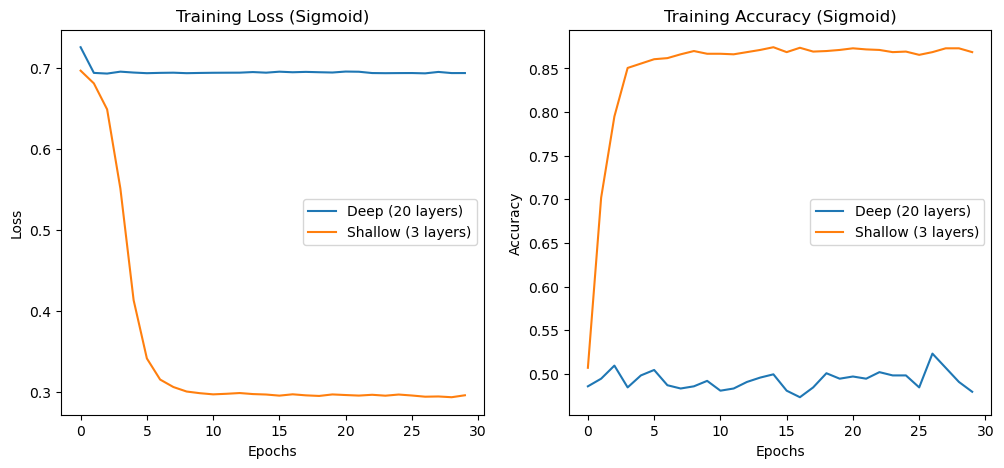

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_deep.history['loss'], label="Deep (20 layers)")
plt.plot(history_shallow.history['loss'], label="Shallow (3 layers)")
plt.title("Training Loss (Sigmoid)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_deep.history['accuracy'], label="Deep (20 layers)")
plt.plot(history_shallow.history['accuracy'], label="Shallow (3 layers)")
plt.title("Training Accuracy (Sigmoid)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

## 6. ReLU로 개선된 깊은 네트워크 학습 비교

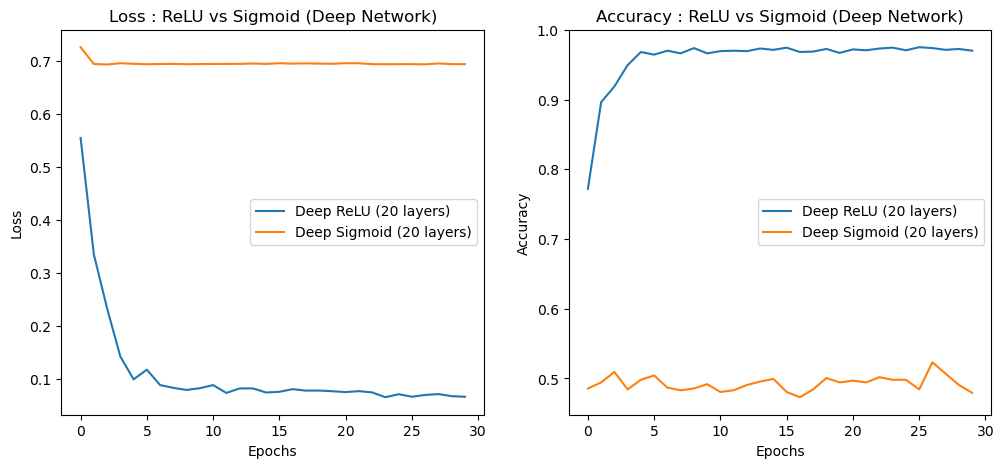

In [17]:
relu_deep = build_deep_model(activation="relu", layers=20)
relu_history = relu_deep.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, verbose=0)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(relu_history.history['loss'], label="Deep ReLU (20 layers)")
plt.plot(history_deep.history['loss'], label="Deep Sigmoid (20 layers)")
plt.title("Loss : ReLU vs Sigmoid (Deep Network)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(relu_history.history['accuracy'], label="Deep ReLU (20 layers)")
plt.plot(history_deep.history['accuracy'], label="Deep Sigmoid (20 layers)")
plt.title("Accuracy : ReLU vs Sigmoid (Deep Network)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

### 7. 생각해보기
- 깊은 신경망에서 Sigmoid 활성화 함수를 사용할 때 발생하는 문제는 무엇인가?
- ReLU 활성화 함수가 Vanishing Gradient Problem을 어떻게 완화시키는가?